### Creating and Persisting an ML Model

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/student-mat.csv', sep=';')
df2 = pd.read_csv('data/ProductionData.csv', sep=',')

In [2]:
from lime.lime_tabular import LimeTabularExplainer

In [3]:
# df.loc[df['studytime'].idxmax()]
df2.loc[df['studytime'].idxmax()]

school              GP
sex                  M
age                 17
address              U
famsize            LE3
Pstatus              T
Medu                 4
Fedu                 3
Mjob           teacher
Fjob          services
reason          course
guardian        mother
traveltime           1
studytime            3
failures             0
schoolsup          yes
famsup             yes
paid               yes
activities          no
nursery            yes
higher             yes
internet           yes
romantic            no
famrel               4
freetime             3
goout                4
Dalc                 4
Walc                 4
health               4
absences             6
G1                  11
G2                  10
G3                  10
Name: 47, dtype: object

Summary of the data

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
df.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

Create a subset of features as an example.

In [6]:
include = ['health', 'absences','age','G3', 'studytime']
df.drop(columns=df.columns.difference(include), inplace=True)  # only using 3 features
df2.drop(columns=df2.columns.difference(include), inplace=True)  # only using 3 features

In [7]:
# df.info
df2.info

<bound method DataFrame.info of        age  studytime  health  absences  G3
0       16          2       5         7  14
1       15          1       4         7   9
2       18          3       1         2  15
3       16          1       2         1  13
4       19          2       3         2  12
...    ...        ...     ...       ...  ..
19995   17          2       5         0  19
19996   16          2       4         0  10
19997   18          1       5         1   9
19998   18          2       3        16   8
19999   16          2       4        18   5

[20000 rows x 5 columns]>

The goal is to predict the quality of the student. We will build a predictor based on the final grade (G3).
Becasue we are trying to find quality students. In this model we define a quality student as one who achieves a final grade of 15 or higher. 

In [8]:
df['qual_student'] = np.where(df['G3']>=15, 1, 0)
df2['qual_student'] = np.where(df2['G3']>=15, 1, 0)

In [9]:
df.describe()

,age,studytime,health,absences,G3,qual_student
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.035443,3.554430,5.708861,10.415190,0.184810
std,1.276043,0.839240,1.390303,8.003096,4.581443,0.388636
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,3.000000,0.000000,8.000000,0.000000
50%,17.000000,2.000000,4.000000,4.000000,11.000000,0.000000
75%,18.000000,2.000000,5.000000,8.000000,14.000000,0.000000
max,22.000000,4.000000,5.000000,75.000000,20.000000,1.000000


<!-- Drop the G3 score -->

In [10]:
include = ['health', 'absences','age','qual_student', 'studytime']
df.drop(columns=df.columns.difference(include), inplace=True)
df2.drop(columns=df.columns.difference(include), inplace=True)

Import scikit-learn and build a random forest classifer

In [11]:
from sklearn.ensemble import RandomForestClassifier as rf
import sklearn
dependent_variable = 'qual_student'
x = df[df.columns.difference([dependent_variable])]
y = df[dependent_variable]
clf = rf(n_estimators = 1000)
clf.fit(x, y)

RandomForestClassifier(n_estimators=1000)

In [12]:
pred = clf.predict(x)
sklearn.metrics.f1_score(y, pred, average='binary')

0.78125

It's not very good! We didn't even cross validate. You'll need to do better :)
Let's export this model so we can use it in a microservice (flask api)

In [13]:
import joblib
# modify the file path to where you want to save the model
joblib.dump(clf, 'app/handlers/model.pkl')

['app/handlers/model.pkl']

In [14]:
query_df = pd.DataFrame({ 'age' : pd.Series(18) ,'health' : pd.Series(5) ,'absences' : pd.Series(10), 'studytime' : pd.Series(4)})

In [15]:
pred = clf.predict(query_df)

/usr/local/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [16]:
pred

array([1])

In [17]:
x

,absences,age,health,studytime
0,6,18,3,2
1,4,17,3,2
2,10,15,3,2
3,2,15,5,3
4,4,16,5,2
...,...,...,...,...
390,11,20,4,2
391,3,17,2,1
392,3,21,3,1
393,0,18,5,1


In [18]:
type(x)

pandas.core.frame.DataFrame

In [19]:
df.head()

,age,studytime,health,absences,qual_student
0,18,2,3,6,0
1,17,2,3,4,0
2,15,2,3,10,0
3,15,3,5,2,1
4,16,2,5,4,0


In [36]:
feature_names = np.array(['absences', 'age', 'health', 'studytime'])
x2 = df2[df.columns.difference([dependent_variable])]

predict_fn_rf = lambda x: clf.predict_proba(x).astype(float)
explainer = LimeTabularExplainer(x.values, feature_names = x.columns, class_names=['Will fail', 'Will succeed'], kernel_width=5)

type(x)

pandas.core.frame.DataFrame

In [40]:
i = np.random.randint(0, x2.to_numpy().shape[0])
print(x.loc[[i]].head())
print(x.loc[[i]].values)
chosen_instance = x2.loc[[i]].values[0]
exp = explainer.explain_instance(chosen_instance, predict_fn_rf, num_features=4)
exp.show_in_notebook(show_all=False)


# print('Increasing absences')
# temp = x.loc[i:i].copy()
# print('P(accept) before:', clf.predict_proba(temp)[0])
# temp.iloc[0].replace(to_replace=temp.iloc[0,0], value = 93, inplace=True)
# print('P(accept) after:', clf.predict_proba(temp)[0])
# print ()

# print('Increasing age')
# temp = x.loc[i:i].copy()
# print('P(accept) before:', clf.predict_proba(temp)[0])
# temp.iloc[0].replace(to_replace=temp.iloc[0,1], value = 22, inplace=True)
# print('P(accept) after:', clf.predict_proba(temp)[0])
# print ()

# print('Increasing health')
# temp = x.loc[i:i].copy()
# print('P(accept) before:', clf.predict_proba(temp)[0])
# temp.iloc[0].replace(to_replace=temp.iloc[0,2], value = 5, inplace=True)
# print('P(accept) after:', clf.predict_proba(temp)[0])
# print ()

# print('Increasing studytime')
# temp = x.loc[i:i].copy()
# print('P(accept) before:', clf.predict_proba(temp)[0])
# temp.iloc[0].replace(to_replace=temp.iloc[0,3], value = 4, inplace=True)
# print('P(accept) after:', clf.predict_proba(temp)[0])
# print ()


# exp.show_in_notebook(show_table=True, show_all=True)

      absences  age  health  studytime
4939        11   16       5          2
[[11 16  5  2]]


/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


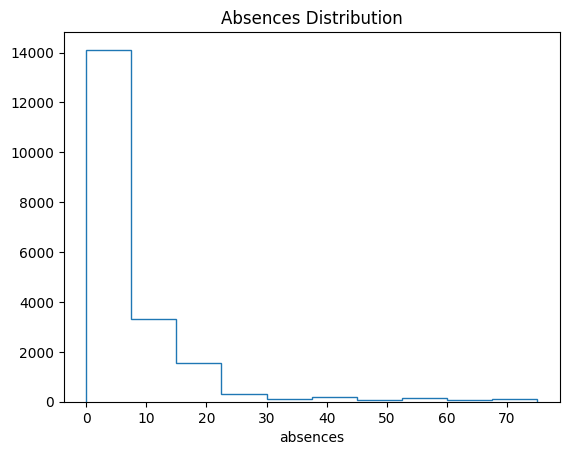

In [78]:
import matplotlib
import matplotlib.pyplot as plt
x_numpy = x.to_numpy().shape[0]
accepted = [[], [], [], []] 
rejected = [[], [], [], []] 
everything = [[], [], [], []] 

preds = clf.predict(x)
for i in range(len(preds)):
    feature_vals = x.iloc[i]
#     print(feature_vals)
    for j in range(4):
#         print('===')
#         print(j, feature_vals[j])
        everything[j].append(feature_vals[j])
#         print(everything)
        if(preds[i]):
            accepted[j].append(feature_vals[j])
        else:
            rejected[j].append(feature_vals[j])
#     print(everything)
# print(everything)
counts, bins = np.histogram(everything[0])
plt.stairs(counts, bins)

plt.title('Absences Distribution')
plt.xlabel('absences')
plt.show()



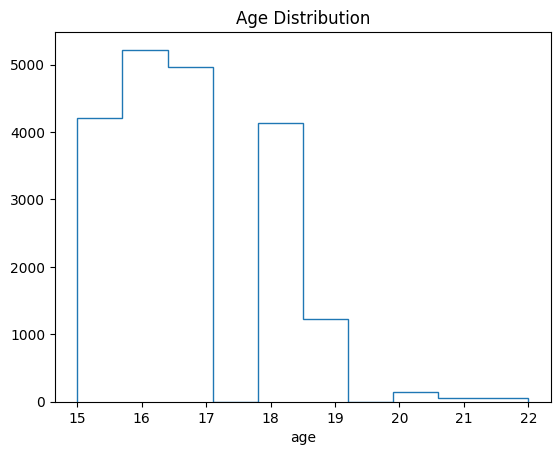

In [79]:
counts, bins = np.histogram(everything[1])
plt.stairs(counts, bins)
plt.title('Age Distribution')
plt.xlabel('age')
plt.show()


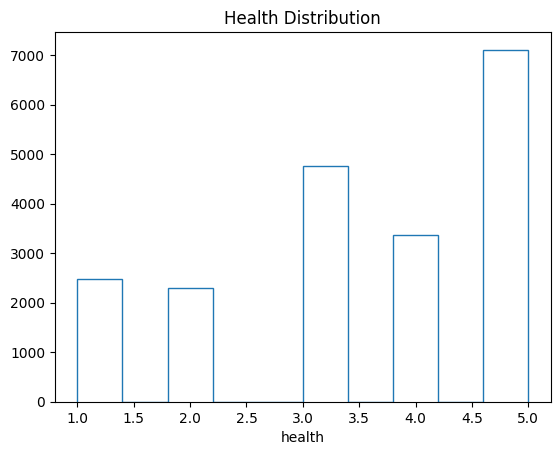

In [80]:
counts, bins = np.histogram(everything[2])
plt.stairs(counts, bins)
plt.title('Health Distribution')
plt.xlabel('health')
plt.show()

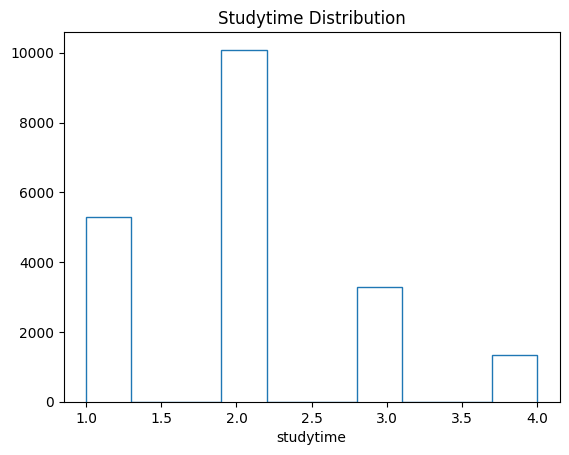

In [81]:
counts, bins = np.histogram(everything[3])
plt.stairs(counts, bins)
plt.title('Studytime Distribution')
plt.xlabel('studytime')
plt.show()

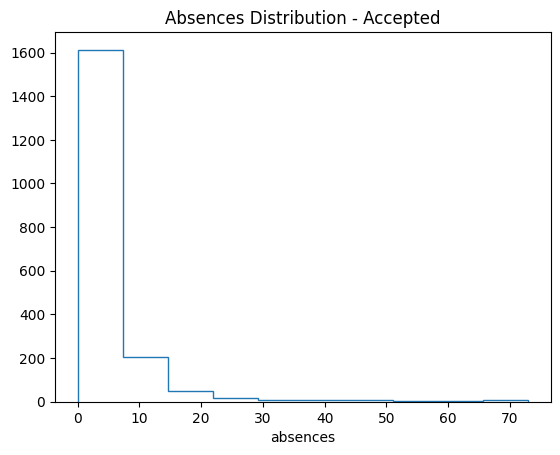

In [82]:
counts, bins = np.histogram(accepted[0])
plt.stairs(counts, bins)
plt.title('Absences Distribution - Accepted')
plt.xlabel('absences')
plt.show()

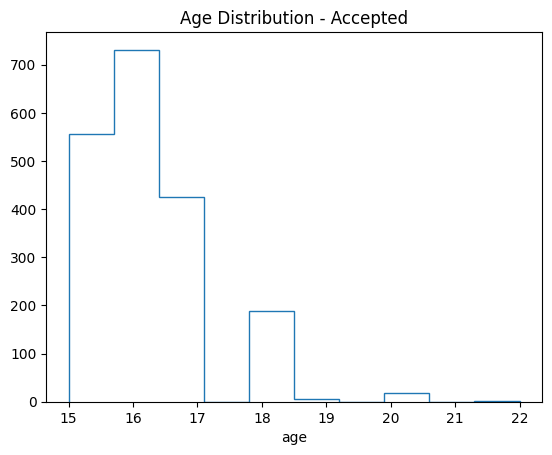

In [83]:
counts, bins = np.histogram(accepted[1])
plt.stairs(counts, bins)
plt.title('Age Distribution - Accepted')
plt.xlabel('age')
plt.show()

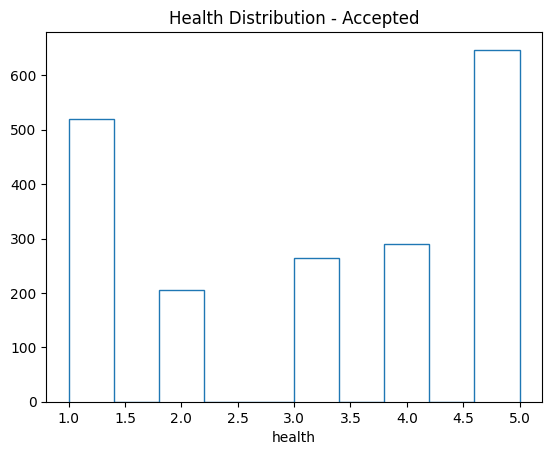

In [84]:
counts, bins = np.histogram(accepted[2])
plt.stairs(counts, bins)
plt.title('Health Distribution - Accepted')
plt.xlabel('health')
plt.show()

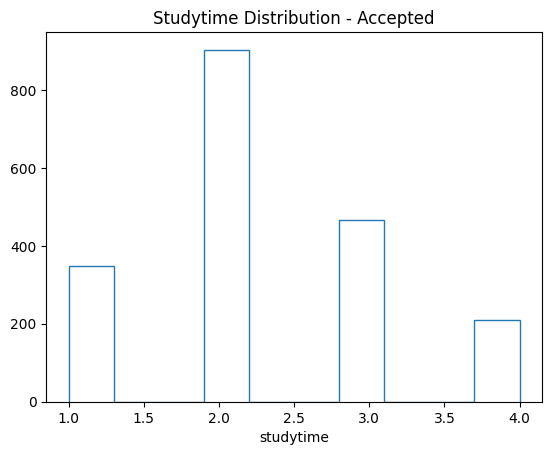

In [85]:
counts, bins = np.histogram(accepted[3])
plt.stairs(counts, bins)
plt.title('Studytime Distribution - Accepted')
plt.xlabel('studytime')
plt.show()

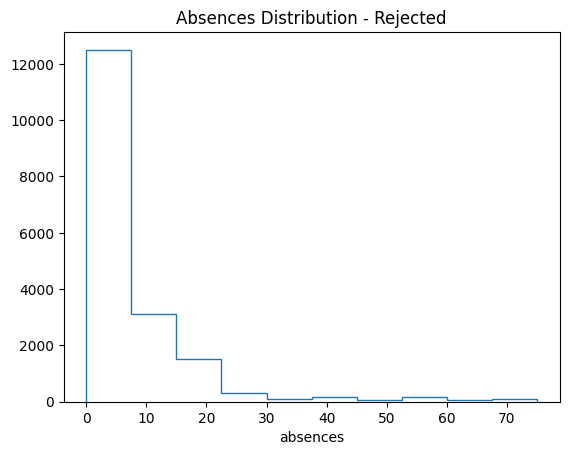

In [86]:
counts, bins = np.histogram(rejected[0])
plt.stairs(counts, bins)
plt.title('Absences Distribution - Rejected')
plt.xlabel('absences')
plt.show()

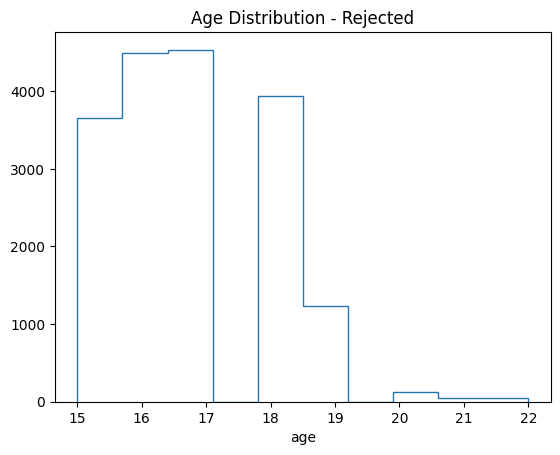

In [87]:
counts, bins = np.histogram(rejected[1])
plt.stairs(counts, bins)
plt.title('Age Distribution - Rejected')
plt.xlabel('age')
plt.show()

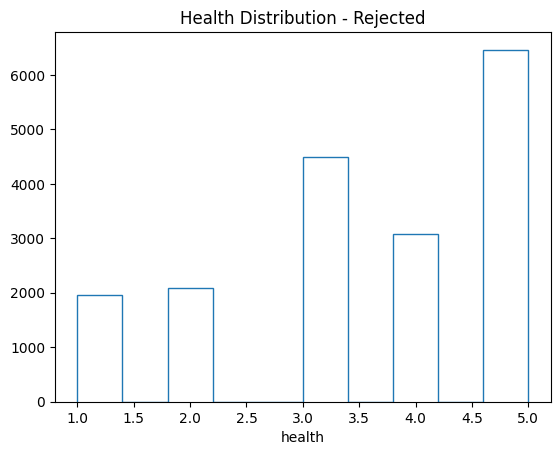

In [88]:
counts, bins = np.histogram(rejected[2])
plt.stairs(counts, bins)
plt.title('Health Distribution - Rejected')
plt.xlabel('health')
plt.show()

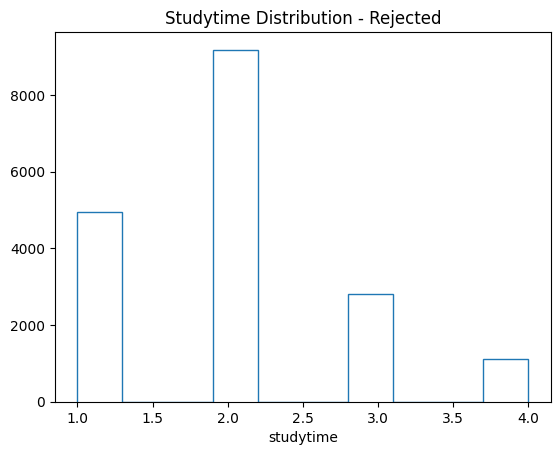

In [89]:
counts, bins = np.histogram(rejected[3])
plt.stairs(counts, bins)
plt.title('Studytime Distribution - Rejected')
plt.xlabel('studytime')
plt.show()